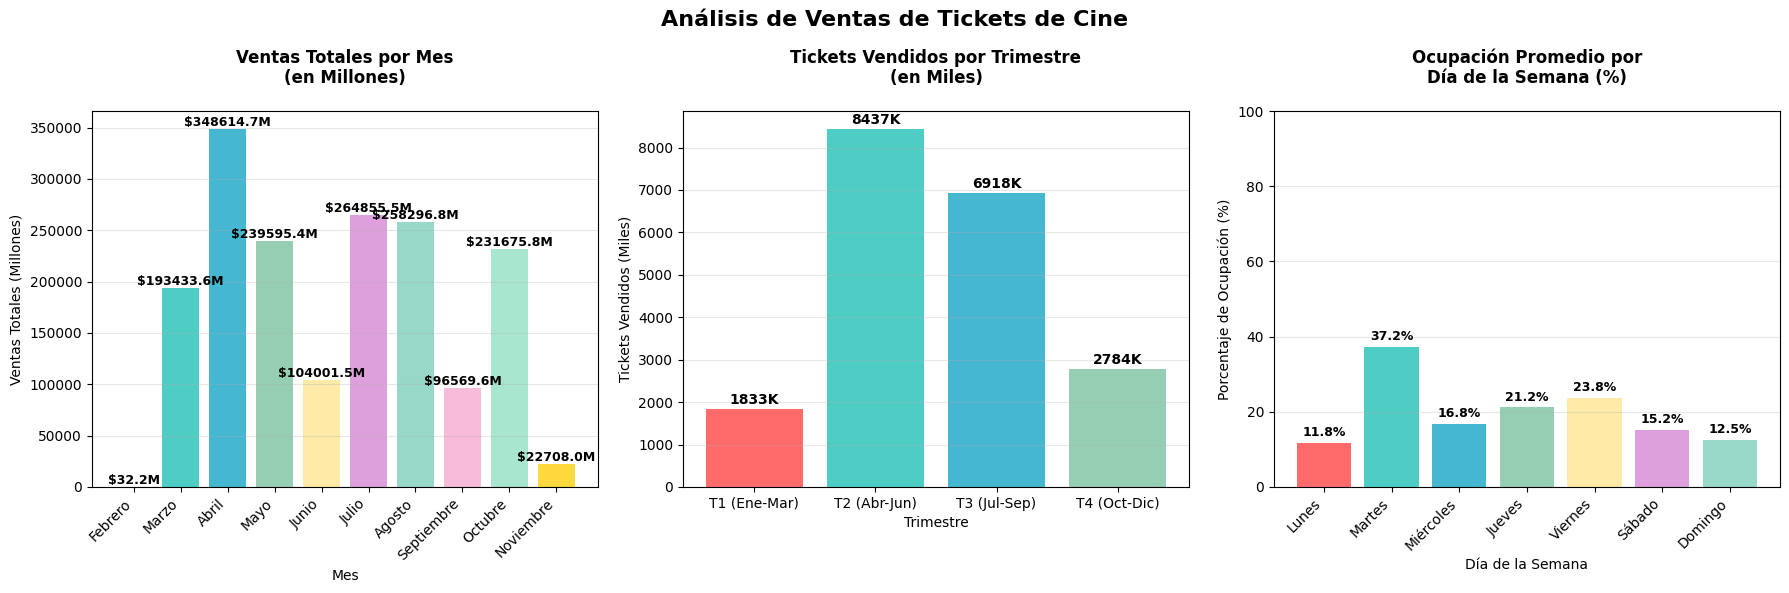

📊 ANÁLISIS DETALLADO DE TICKETS DE CINE
📈 Total de registros analizados: 142,524
💰 Ventas totales del período: $1759783.1 millones
🎫 Total de tickets vendidos: 19,972,967
🎭 Ocupación promedio general: 20.0%

📅 GRÁFICA 1: VENTAS TOTALES POR MES
📊 EXPLICACIÓN:
   Esta gráfica muestra las ventas totales (en millones de pesos/dólares) por cada mes.
   Te permite identificar los meses de mayor y menor facturación del cine.

📈 ANÁLISIS DE RESULTADOS:
   • MES CON MAYORES VENTAS: Abril - $348614.7 millones
   • MES CON MENORES VENTAS: Febrero - $32.2 millones
   • DIFERENCIA: 1082218.1% más ventas en el mejor mes

💡 INTERPRETACIÓN COMERCIAL:
   ✓ Esta información es clave para planificar estrenos y campañas publicitarias

📅 GRÁFICA 2: TICKETS VENDIDOS POR TRIMESTRE
📊 EXPLICACIÓN:
   Esta gráfica agrupa las ventas de tickets en trimestres (cada 3 meses).
   Facilita ver las tendencias estacionales del negocio cinematográfico.

📈 ANÁLISIS DE RESULTADOS:
   • TRIMESTRE CON MÁS TICKETS: T2 (Abr-J

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar matplotlib para mostrar texto en español
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('default')

# Leer el archivo CSV
df = pd.read_csv('cinemaTicket_Ref.csv')

# Convertir la fecha a datetime si es necesario
df['date'] = pd.to_datetime(df['date'])

# Crear diccionarios para traducir meses y trimestres
meses_es = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

trimestres_es = {
    1: 'T1 (Ene-Mar)', 2: 'T2 (Abr-Jun)',
    3: 'T3 (Jul-Sep)', 4: 'T4 (Oct-Dic)'
}

# Crear figura con 3 gráficas de barras
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Análisis de Ventas de Tickets de Cine', fontsize=16, fontweight='bold')

# Colores personalizados
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8', '#F8BBD9', '#A8E6CF', '#FFD93D', '#6C5CE7', '#A29BFE']

# GRÁFICA 1: Ventas Totales por Mes
ventas_por_mes = df.groupby('month')['total_sales'].sum().sort_index()
meses_labels = [meses_es[mes] for mes in ventas_por_mes.index]

ax1 = axes[0]
bars1 = ax1.bar(range(len(ventas_por_mes)), ventas_por_mes.values / 1000000, color=colors[:len(ventas_por_mes)])
ax1.set_title('Ventas Totales por Mes\n(en Millones)', fontweight='bold', pad=20)
ax1.set_xlabel('Mes')
ax1.set_ylabel('Ventas Totales (Millones)')
ax1.set_xticks(range(len(ventas_por_mes)))
ax1.set_xticklabels(meses_labels, rotation=45, ha='right')

# Añadir valores en las barras
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'${height:.1f}M', ha='center', va='bottom', fontweight='bold', fontsize=9)

ax1.grid(axis='y', alpha=0.3)

# GRÁFICA 2: Tickets Vendidos por Trimestre
tickets_por_trimestre = df.groupby('quarter')['tickets_sold'].sum()
trimestres_labels = [trimestres_es[trim] for trim in tickets_por_trimestre.index]

ax2 = axes[1]
bars2 = ax2.bar(range(len(tickets_por_trimestre)), tickets_por_trimestre.values / 1000, color=colors[:len(tickets_por_trimestre)])
ax2.set_title('Tickets Vendidos por Trimestre\n(en Miles)', fontweight='bold', pad=20)
ax2.set_xlabel('Trimestre')
ax2.set_ylabel('Tickets Vendidos (Miles)')
ax2.set_xticks(range(len(tickets_por_trimestre)))
ax2.set_xticklabels(trimestres_labels)

# Añadir valores en las barras
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{height:.0f}K', ha='center', va='bottom', fontweight='bold', fontsize=10)

ax2.grid(axis='y', alpha=0.3)

# GRÁFICA 3: Ocupación Promedio por Día de la Semana
# Crear nombres de días en español
dias_es = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
df['dia_semana'] = df['date'].dt.dayofweek
ocupacion_por_dia = df.groupby('dia_semana')['occu_perc'].mean()
dias_labels = [dias_es[dia] for dia in ocupacion_por_dia.index]

ax3 = axes[2]
bars3 = ax3.bar(range(len(ocupacion_por_dia)), ocupacion_por_dia.values, color=colors[:len(ocupacion_por_dia)])
ax3.set_title('Ocupación Promedio por\nDía de la Semana (%)', fontweight='bold', pad=20)
ax3.set_xlabel('Día de la Semana')
ax3.set_ylabel('Porcentaje de Ocupación (%)')
ax3.set_xticks(range(len(ocupacion_por_dia)))
ax3.set_xticklabels(dias_labels, rotation=45, ha='right')
ax3.set_ylim(0, 100)

# Añadir valores en las barras
for i, bar in enumerate(bars3):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

ax3.grid(axis='y', alpha=0.3)

# Ajustar espaciado
plt.tight_layout()
plt.show()

# ANÁLISIS Y EXPLICACIONES EN ESPAÑOL
print("="*80)
print("📊 ANÁLISIS DETALLADO DE TICKETS DE CINE")
print("="*80)
print(f"📈 Total de registros analizados: {len(df):,}")
print(f"💰 Ventas totales del período: ${df['total_sales'].sum()/1000000:.1f} millones")
print(f"🎫 Total de tickets vendidos: {df['tickets_sold'].sum():,}")
print(f"🎭 Ocupación promedio general: {df['occu_perc'].mean():.1f}%")
print()

print("="*80)
print("📅 GRÁFICA 1: VENTAS TOTALES POR MES")
print("="*80)
print("📊 EXPLICACIÓN:")
print("   Esta gráfica muestra las ventas totales (en millones de pesos/dólares) por cada mes.")
print("   Te permite identificar los meses de mayor y menor facturación del cine.")
print()
print("📈 ANÁLISIS DE RESULTADOS:")
mes_mayor_venta = ventas_por_mes.idxmax()
mes_menor_venta = ventas_por_mes.idxmin()
print(f"   • MES CON MAYORES VENTAS: {meses_es[mes_mayor_venta]} - ${ventas_por_mes[mes_mayor_venta]/1000000:.1f} millones")
print(f"   • MES CON MENORES VENTAS: {meses_es[mes_menor_venta]} - ${ventas_por_mes[mes_menor_venta]/1000000:.1f} millones")
diferencia_ventas = ((ventas_por_mes[mes_mayor_venta] - ventas_por_mes[mes_menor_venta]) / ventas_por_mes[mes_menor_venta]) * 100
print(f"   • DIFERENCIA: {diferencia_ventas:.1f}% más ventas en el mejor mes")
print()
print("💡 INTERPRETACIÓN COMERCIAL:")
if mes_mayor_venta in [6, 7, 8]:
    print("   ✓ Las mayores ventas en verano indican éxito en temporada alta")
elif mes_mayor_venta in [11, 12]:
    print("   ✓ Las mayores ventas en fin de año aprovechan las fiestas navideñas")
print("   ✓ Esta información es clave para planificar estrenos y campañas publicitarias")
print()

print("="*80)
print("📅 GRÁFICA 2: TICKETS VENDIDOS POR TRIMESTRE")
print("="*80)
print("📊 EXPLICACIÓN:")
print("   Esta gráfica agrupa las ventas de tickets en trimestres (cada 3 meses).")
print("   Facilita ver las tendencias estacionales del negocio cinematográfico.")
print()
print("📈 ANÁLISIS DE RESULTADOS:")
trim_mayor_tickets = tickets_por_trimestre.idxmax()
trim_menor_tickets = tickets_por_trimestre.idxmin()
print(f"   • TRIMESTRE CON MÁS TICKETS: {trimestres_es[trim_mayor_tickets]} - {tickets_por_trimestre[trim_mayor_tickets]/1000:.0f}K tickets")
print(f"   • TRIMESTRE CON MENOS TICKETS: {trimestres_es[trim_menor_tickets]} - {tickets_por_trimestre[trim_menor_tickets]/1000:.0f}K tickets")
for trim, tickets in tickets_por_trimestre.items():
    porcentaje = (tickets / tickets_por_trimestre.sum()) * 100
    print(f"   • {trimestres_es[trim]}: {porcentaje:.1f}% del total anual")
print()
print("💡 INTERPRETACIÓN COMERCIAL:")
print("   ✓ Identifica las temporadas altas y bajas para ajustar inventario")
print("   ✓ Ayuda a planificar el personal y recursos por temporada")
print("   ✓ Útil para negociar con distribuidoras según demanda estacional")
print()

print("="*80)
print("📅 GRÁFICA 3: OCUPACIÓN POR DÍA DE LA SEMANA")
print("="*80)
print("📊 EXPLICACIÓN:")
print("   Esta gráfica muestra el porcentaje promedio de ocupación de las salas")
print("   según el día de la semana. 100% significa salas completamente llenas.")
print()
print("📈 ANÁLISIS DE RESULTADOS:")
dia_mayor_ocupacion = ocupacion_por_dia.idxmax()
dia_menor_ocupacion = ocupacion_por_dia.idxmin()
print(f"   • DÍA CON MAYOR OCUPACIÓN: {dias_es[dia_mayor_ocupacion]} - {ocupacion_por_dia[dia_mayor_ocupacion]:.1f}%")
print(f"   • DÍA CON MENOR OCUPACIÓN: {dias_es[dia_menor_ocupacion]} - {ocupacion_por_dia[dia_menor_ocupacion]:.1f}%")
print()
print("📊 OCUPACIÓN POR DÍA:")
for dia, ocupacion in ocupacion_por_dia.items():
    emoji = "🔥" if ocupacion > ocupacion_por_dia.mean() else "📉"
    print(f"   • {dias_es[dia]}: {ocupacion:.1f}% {emoji}")
print()
print("💡 INTERPRETACIÓN COMERCIAL:")
if ocupacion_por_dia[5] > ocupacion_por_dia.mean() or ocupacion_por_dia[6] > ocupacion_por_dia.mean():
    print("   ✓ Los fines de semana son más populares - programar más funciones")
if ocupacion_por_dia[0] < ocupacion_por_dia.mean():
    print("   ✓ Los lunes tienen menor demanda - ideal para mantenimiento")
print("   ✓ Usar esta info para ajustar precios y promociones por día")
print("   ✓ Programar estrenos importantes en días de mayor ocupación")

print("\n" + "="*80)
print("🎯 CONCLUSIONES GENERALES Y RECOMENDACIONES")
print("="*80)
precio_promedio = df['ticket_price'].mean()
print(f"1. 💰 PRECIO PROMEDIO DE TICKET: ${precio_promedio:.2f}")
print(f"2. 🎭 CAPACIDAD PROMEDIO DE SALAS: {df['capacity'].mean():.0f} asientos")
print(f"3. 📊 UTILIZACIÓN DE SALAS: {df['occu_perc'].mean():.1f}% en promedio")
print()
print("📈 OPORTUNIDADES DE MEJORA:")
if df['occu_perc'].mean() < 70:
    print("   • Ocupación baja - considerar más promociones y marketing")
if df['occu_perc'].std() > 20:
    print("   • Alta variabilidad - optimizar programación por horarios")
print("   • Analizar qué películas generan mayor ocupación")
print("   • Implementar precios dinámicos según demanda por día")
print("   • Crear paquetes especiales para días de menor demanda")